In [1]:
from tensorflow.python.keras.preprocessing import image
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/home/entilza/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/entilza/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/entilza/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/entilza/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

In [2]:
def SizeImage(im, heigh, width):
    mask_shape = (heigh,width,3)
    if len(im.shape) == 2:
        mask_shape = (heigh,width)
    mask = np.zeros(mask_shape, dtype = np.uint8)
    mask[:] = 128
    if im.shape[0]> im.shape[1]:
        k = float(heigh/im.shape[0])
        resize_img = cv2.resize(im,(int(im.shape[1]*k), heigh), interpolation = cv2.INTER_AREA)
        a = int((width - resize_img.shape[1])/2)
        b = resize_img.shape[1]+a
        mask[:,a:b]= resize_img
    else:
        k = float(heigh/im.shape[1])
        resize_img = cv2.resize(im,(width, int(im.shape[0]*k)), interpolation = cv2.INTER_AREA)
        c = int((heigh - resize_img.shape[0])/2)
        d = int(resize_img.shape[0]+c)
        mask [c:d,:]= resize_img
    return mask

In [3]:
import shutil
import os

def create_directory(dir_name):
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name)
    
def TransformBatch(dirName, df):
    create_directory("./bigpic/transformed/"+ dirName)
    for k in range(len(df)):
        fileName = df.iloc[k,0]
        #print(fileName)
        img = cv2.imread(fileName)
        img = SizeImage(img, 150,150)
        arr = fileName.split("/")
        cv2.imwrite("./bigpic/transformed/"+ dirName + "/" + arr[-1], img)
        #print(v)

In [4]:
train_df = pd.read_csv("./bigpic/train.csv", header=None)
valid_df = pd.read_csv("./bigpic/val.csv", header=None)
test_df = pd.read_csv("./bigpic/test.csv", header=None)

TransformBatch("./bigpic/train", train_df)
TransformBatch("./bigpic/val", valid_df)
TransformBatch("./bigpic/test", test_df)

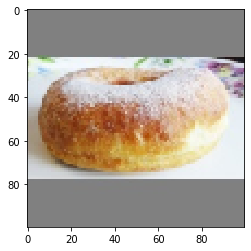

In [7]:
image_file_name = './bigpic/transformed/train/ponchik.130.jpg'
#img = image.load_img(image_file_name)
#img_array = image.img_to_array(img)
#img = cv2.imread(image_file_name)
#img_array = SizeImage(img_array, 150,150)
img_array = image.load_img(image_file_name, target_size=(100, 100))
plt.imshow(img_array)